In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

first in grayscale

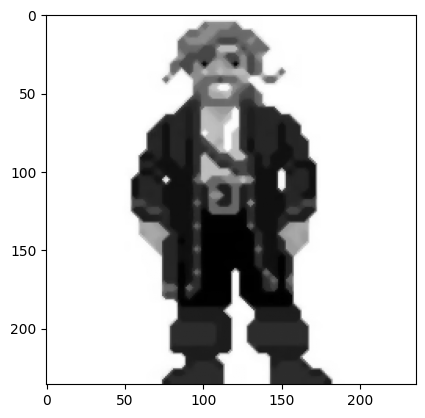

In [2]:
guybrush = cv2.imread('guybrush.jpg', 0)

guybrush = cv2.medianBlur(guybrush, 5)
plt.imshow(guybrush, cmap='gray', vmin=0, vmax=255)

In [3]:
guybrush_sobelx = np.absolute(cv2.Sobel(guybrush, cv2.CV_64F, 1, 0, ksize=5))
guybrush_sobely = np.absolute(cv2.Sobel(guybrush, cv2.CV_64F, 0, 1, ksize=5))

In [4]:
guybrush_sobelx = guybrush_sobelx / (guybrush_sobelx.max() - guybrush_sobelx.min()) * 255
guybrush_sobely = guybrush_sobely / (guybrush_sobely.max() - guybrush_sobely.min()) * 255


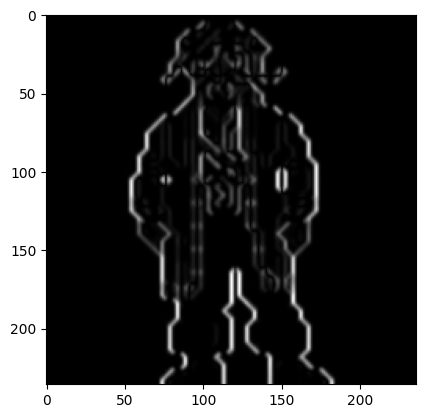

In [5]:
plt.imshow(guybrush_sobelx, cmap='gray', vmin=0, vmax=255)

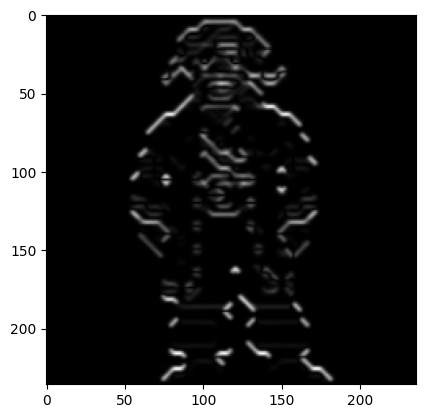

In [6]:
plt.imshow(guybrush_sobely, cmap='gray', vmin=0, vmax=255)

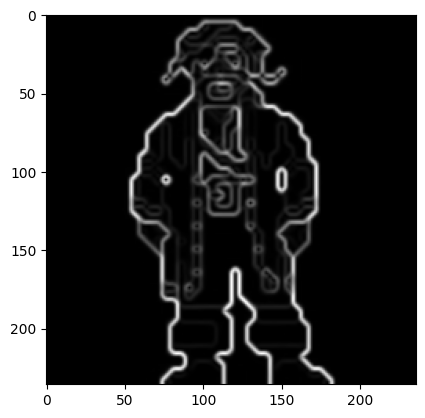

In [7]:
guybrush_mag = np.clip(np.sqrt(guybrush_sobelx**2 + guybrush_sobely**2), 0., 255.)

plt.imshow(guybrush_mag, cmap='gray', vmin=0, vmax=255)

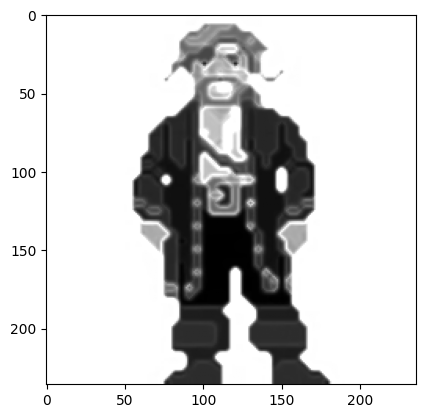

In [8]:
guybrush_sharp = cv2.add(guybrush.astype(float), guybrush_mag)
# guybrush_sharp = cv2.addWeighted(guybrush.astype(float), 1.0, guybrush_mag, 1.0, 0)

guybrush_sharp = np.clip(guybrush_sharp, 0., 255.).astype(np.uint8)

plt.imshow(guybrush_sharp, cmap='gray', vmin=0, vmax=255)

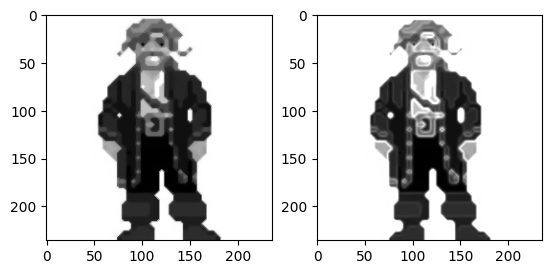

In [9]:
plt.subplot(121)
plt.imshow(guybrush, cmap='gray', vmin=0, vmax=255)
plt.subplot(122)
plt.imshow(guybrush_sharp, cmap='gray', vmin=0, vmax=255)